# The Big Mac Index - What is it?

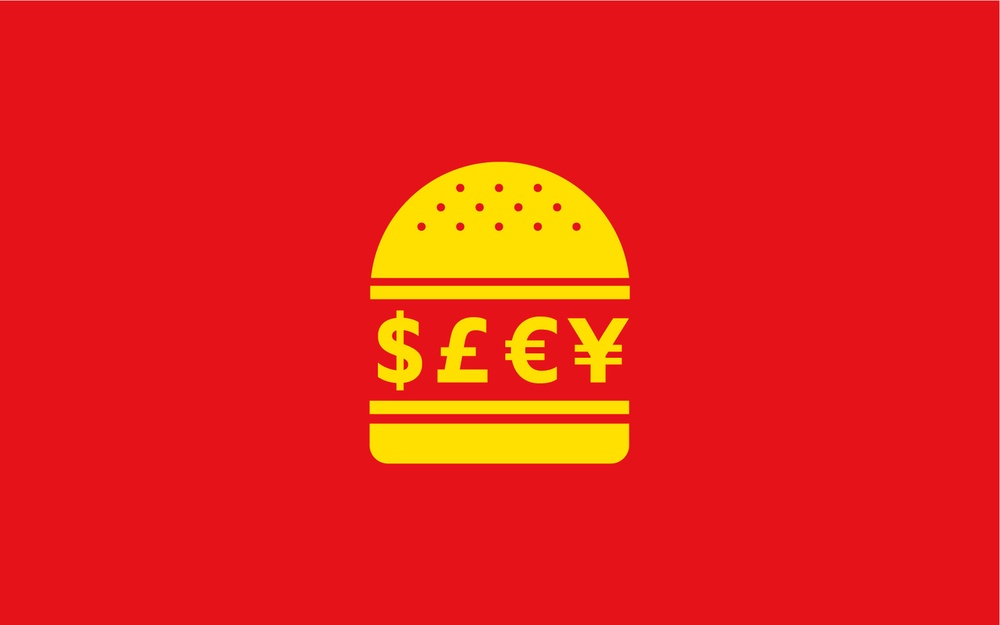

Image Source: [https://source.opennews.org/articles/how-we-made-new-big-mac-index-interactive/](http://)

## Introduction

The Big Mac index is a measure to compare the purchasing power parity (PPP) - the ability to buy a certain 'basket of goods' using a fixed nominal amount of that country's money or currency - between different countries by making the basket of goods or item of purchase a Big Mac burger. This was developed by The Economist in 1986 as a way to contextualize the exchange rates and PPP values generally used for average consumers.

To further break it down... <br>
Since the Big Mac is a burger (with a standard size, recipe, and quality) sold in many countries globally, by comparing the cost of a Big Mac in country A's currency to cost of a Big Mac in country B's currency we can compare the 'purchasing power' of both currencies (i.e. how much big mac each currency can buy). This is important because most people tend to think exchange rate and PPP are the same, but that is not the case. The exchange rate is influenced by household, business, and government activity while PPP is more specific to consumers and households. Knowing how much you can afford to buy in everyday life with a certain currency is a better measure of its value than seeing how much of a different currency it can buy.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Data

We will be using the raw Big Mac index values and do any necessary calculations ourselves.

In [ ]:
# Importing dataset
data = pd.read_csv('../input/the-economists-big-mac-index/output-data/big-mac-adjusted-index.csv')
data.head(10)

## Understanding the Data

Before doing any analysis, we need to understand what each value in the data represents and whether it is important for us to know.

For this we will be looking at the columns provided and what each of them are. 

In [ ]:
data.isna().sum()

This means that the data is complete and there are no null (empty) values anywhere in the data

In [ ]:
data.info()

Now we know there are 14 unique columns and 702 row entries in this data set.

The columns `dollar_ex` and `dollar_price` can cause confusion as there are several countries that use a dollar currency. So we simply verify this to see which country currency matched up for those columns.

In [ ]:
# selecting rows based on condition 
rslt_df = data.loc[(data['local_price'] == data['dollar_price']) & (data['date'].str[0:4] == '2020')] 
rslt_df

So we know it is referring to the USD.

Now let's break down what each of these columns represent as given by the data description.

`date`: Date of observation

`iso_a3`: ISO 3166-1 country code

`currency_code`: ISO 4217 currency code

`name`: Name of the country

`local_price`: Price of a Big Mac in the local currency

`dollar_ex`: Exchange rate for local currency units per dollar

`dollar_price`: Price of a Big Mac in dollars

`GDP_dollar`: GDP per person, in dollars

`adj_price`: GDP-adjusted price of a Big Mac, in dollars

`USD`: Raw index, relative to the US Dollar	

`EUR`: Raw index, relative to the Euro

`GBP`: Raw index, relative to the British Pound

`JPY`: Raw index, relative to the Japanese Yen

`CNY`: Raw index, relative to the Chinese Yuan

## Analyzing and Visualizing Data

In [ ]:
# importing libraries for data visualizatioI
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Converting the entries in the date column to the timestamp data type to improve usability
data['date'] = data['date'].astype('datetime64[ns]') 
data.head()
type(data['date'][0])

First we should see if there are any trends or major changes for different currencies over time that may indicate major economic events in those specific countries.

In [ ]:
sns.set(rc={'figure.figsize':(40,20)})
sns.set_style('whitegrid')
fig = sns.lineplot(x='date', y='dollar_price', data=data, hue = 'name')
fig.legend(loc='upper right', ncol=1)

*Well this is a mess.*

Tracking the `dollar_price` of the Big Mac over time, we cannot identify trends. This may be due to the exchange rate between the USD and each other currency fluctuating resulting in what seems to be inconsistencies in price.

So, we should try using the other measures of Big Mac price given to us. Those being `adj_price` and `local_price`. These are more likely to stay consistent as they will rely less on external factors such as exchange rates.

In [ ]:
sns.set(rc={'figure.figsize':(40,20)})
sns.set_style('whitegrid')
fig = sns.lineplot(x='date', y='local_price', data=data, 
             hue = 'name')
fig.legend(loc='upper right', ncol=1)

This figure shows us how the `local_price` for Big Macs has changed over time. 

Despite the large scale potentially skewing our view of this timeseries, it gives us an expectation of how each currency generally prices a Big Mac i.e. having a nominal worth in the 1's, 10's, 100's, or 1000's for a currency. This combined with our own personal knowledge of how goods are priced relative to a Big Mac, we can make predictions about the denominations of money each currency uses, and the relative price of cheaper or more expensive goods.**

In [ ]:
sns.set(rc={'figure.figsize':(40,20)})
sns.set_style('whitegrid')
fig = sns.lineplot(x='date', y='adj_price', data=data, 
             hue = 'name')
fig.legend(loc='upper right', ncol=1)

This figure shows us how the `adj_price` for a Big Mac has changed over time. This shows us the prices of Big Macs in different countries adjusted to be represented in USD. 

We can see a general trend with sharp and consistent changes in prices across countries, meaning that rather than being influence by economic factors, changes in price may have been a result of a business or pricing decision.

This means we can compare the purchasing power between two countries by examining their relative positions in this figure.

In [ ]:
temp_data = data.groupby(["name"])['USD'].aggregate(np.mean).reset_index().sort_values('USD')
temp_data['Rank']=np.arange(1,1+len(temp_data))
dollar_ex = data.groupby(["name"])['dollar_ex'].aggregate(np.mean)

In [ ]:
temp_data.head()

In [ ]:
sns.set(rc={'figure.figsize':(15,20)})
sns.set_style('ticks')
sns.barplot(x=temp_data['USD'], y=temp_data['name'], data=temp_data, ci=None, order=temp_data['name'])

Here we can see the Raw index relative to the US Dollar for each country from lowest to highest.
What we can infer from this 